# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(1판) 교재의 소스 코드**
## *11장 신경망과 퍼셉트론*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 11.3 신경망을 만들기 위한 간단한 행렬 표현법

In [ ]:
import numpy as np

X = np.array([1, 2])     # 입력 벡터 X
W = np.array([0.5, 0.6]) # 가중치 벡터 W 
X * W                    # 두 벡터의 성분별 곱셈

array([0.5, 1.2])

In [ ]:
np.sum( X * W ), np.dot(X, W)  # sum함수, dot함수를 사용하여 가중합 구하기

(1.7, 1.7)

In [ ]:
X = np.array([1, 2])    # 넘파이 ndarray 객체 X 생성
W = np.array([[1, 2, 3], [4, 5, 6]]) # 2x3 크기의 ndarray 객체 W 생성
A = np.dot(X, W)
print('A =', A)

A = [ 9 12 15]


### 11.3 AND와 OR 회로를 퍼셉트론으로 만들자

In [ ]:
import numpy as np

def activation(s):
   if s > 0: return 1
   else : return -1

def perceptron(x1, x2):
   x = np.array([x1, x2])
   tmp = np.sum( W * x ) + b
   #print(x1,'*',W[0],'+',x2,'*',W[1],'+', b, '=', tmp)
   return activation(tmp)

In [ ]:
print('--- 퍼셉트론으로 구현한 AND 회로 ---')
W = np.array([0.5, 0.5])
b = -0.7   
for x1, x2 in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(x1, x2)
    print('{:3d} {:3d} : {:3d}'.format(x1, x2, y))

--- 퍼셉트론으로 구현한 AND 회로 ---
 -1  -1 :  -1
 -1   1 :  -1
  1  -1 :  -1
  1   1 :   1


In [ ]:
W = np.array([0.5, 0.5])
b = 0.7
print('--- 퍼셉트론으로 구현한 OR 회로 ---')
for x1, x2  in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(x1, x2)
    print('{:3d} {:3d} : {:3d}'.format(x1, x2, y))

--- 퍼셉트론으로 구현한 OR 회로 ---
 -1  -1 :  -1
 -1   1 :   1
  1  -1 :   1
  1   1 :   1


In [ ]:
print('--- 퍼셉트론으로 구현한 NAND 회로 ---')
W = np.array([-0.5, -0.5])
b = 0.7   
for x1, x2 in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(x1, x2)
    print('{:3d} {:3d} : {:3d}'.format(x1, x2, y))

--- 퍼셉트론으로 구현한 NAND 회로 ---
 -1  -1 :   1
 -1   1 :   1
  1  -1 :   1
  1   1 :  -1


### 11.6 퍼셉트론을 학습시키는 알고리즘을 구현하자

In [ ]:
import numpy as np

def activation(s):
   if s > 0: return 1
   else : return -1

def out(x):
   return activation(W.dot(x))

In [ ]:
def train(X, Y, epochs=10):
   global W, learning_rate
   for t in range(epochs):
       print('epoch =', t, '\n==============================')
       ajusted = 0
       for i in range(len(X)):
           Y_hat = out(X[i])
           error = Y[i] - Y_hat
           if error != 0 : ajusted += 1
           W += learning_rate * error * X[i]
           print('입력:', X[i], '정답:', Y[i], '출력:', Y_hat, \
                 '변경된 가중치:', W, 'error:', error)
       if ajusted == 0 : return

X = np.array([[-1, -1, 1],
             [-1,  1, 1],
             [ 1, -1, 1],
             [ 1,  1, 1]])
Y = np.array([-1, -1, -1, 1])
W = np.array([0, 0, 0], dtype=np.float64)  # 임의의 초기 가중치
learning_rate = 0.1
train(X, Y, 100)

epoch = 0 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [-1  1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [ 1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [1 1 1] 정답: 1 출력: -1 변경된 가중치: [0.2 0.2 0.2] error: 2
epoch = 1 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0.2 0.2 0.2] error: 0
입력: [-1  1  1] 정답: -1 출력: 1 변경된 가중치: [0.4 0.  0. ] error: -2
입력: [ 1 -1  1] 정답: -1 출력: 1 변경된 가중치: [ 0.2  0.2 -0.2] error: -2
입력: [1 1 1] 정답: 1 출력: 1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
epoch = 2 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
입력: [-1  1  1] 정답: -1 출력: -1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
입력: [ 1 -1  1] 정답: -1 출력: -1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
입력: [1 1 1] 정답: 1 출력: 1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0


In [ ]:
def predict(X, circuit) :
  print('\n퍼셉트론의 예측 결과({} 회로)\nx0  x1   y'.format(circuit))
  for x in X:
      print('{:2d} {:3d} {:3d}'.format(x[0], x[1], out(x)))

predict(X, 'AND')


퍼셉트론의 예측 결과(AND 회로)
x0  x1   y
-1  -1  -1
-1   1  -1
 1  -1  -1
 1   1   1


### 12.6 인공지능의 겨울 : 퍼셉트론의 한계와 XOR 문제

In [ ]:
X = np.array([[-1, -1, 1],
              [-1,  1, 1],
              [ 1, -1, 1],
              [ 1,  1, 1]])
Y = np.array([-1, 1, 1, -1])
W = np.array([0, 0, 0], dtype=np.float64)  # 임의의 초기 가중치
learning_rate = 0.1

train(X, Y, 100)
predict(X, 'XOR')

epoch = 0 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [-1  1  1] 정답: 1 출력: -1 변경된 가중치: [-0.2  0.2  0.2] error: 2
입력: [ 1 -1  1] 정답: 1 출력: -1 변경된 가중치: [0.  0.  0.4] error: 2
입력: [1 1 1] 정답: -1 출력: 1 변경된 가중치: [-0.2 -0.2  0.2] error: -2
epoch = 1 
입력: [-1 -1  1] 정답: -1 출력: 1 변경된 가중치: [0. 0. 0.] error: -2
입력: [-1  1  1] 정답: 1 출력: -1 변경된 가중치: [-0.2  0.2  0.2] error: 2
입력: [ 1 -1  1] 정답: 1 출력: -1 변경된 가중치: [0.  0.  0.4] error: 2
입력: [1 1 1] 정답: -1 출력: 1 변경된 가중치: [-0.2 -0.2  0.2] error: -2
epoch = 2 
입력: [-1 -1  1] 정답: -1 출력: 1 변경된 가중치: [0. 0. 0.] error: -2
입력: [-1  1  1] 정답: 1 출력: -1 변경된 가중치: [-0.2  0.2  0.2] error: 2
입력: [ 1 -1  1] 정답: 1 출력: -1 변경된 가중치: [0.  0.  0.4] error: 2
입력: [1 1 1] 정답: -1 출력: 1 변경된 가중치: [-0.2 -0.2  0.2] error: -2
epoch = 3 
입력: [-1 -1  1] 정답: -1 출력: 1 변경된 가중치: [0. 0. 0.] error: -2
입력: [-1  1  1] 정답: 1 출력: -1 변경된 가중치: [-0.2  0.2  0.2] error: 2
입력: [ 1 -1  1] 정답: 1 출력: -1 변경된 가중치: [0.  0.  0.4] error: 2
입력: [1 1 1] 정답: -1 출력: 1 변경된 가중치: [-0.2 -0.2  0.2

### 12.7 다층 퍼셉트론으로 XOR 연산을 하자

In [ ]:
import numpy as np

# 가중치와 바이어스
w1 = np.array([.5, .5])
w2 = np.array([.5, .5])
b1, b2 = -.7, .7

def activation(s):
   if s > 0: return 1
   else : return -1

def perceptron(x, w, b):  # 퍼셉트론
   y = np.sum(w * x) + b
   return activation(y)

def AND(x1, x2):          # AND 게이트
   return perceptron(np.array([x1, x2]), w1, b1)

def NAND(x1, x2):         # NAND 게이트
   return perceptron(np.array([x1, x2]), -w1, -b1)

def OR(x1, x2):           # OR 게이트
   return perceptron(np.array([x1, x2]), w2, b2)

def XOR(x1, x2):          # XOR 게이트
   return AND(NAND(x1, x2),OR(x1, x2))

print('--- 다층 퍼셉트론으로 구현한 XOR 회로 ---')
for x in [(-1, -1), (1, -1), (-1, 1), (1, 1)]:
   y = XOR(x[0], x[1])
   print('{:2d} {:3d} : {:3d}'.format(x[0], x[1], y))

--- 다층 퍼셉트론으로 구현한 XOR 회로 ---
-1  -1 :  -1
 1  -1 :   1
-1   1 :   1
 1   1 :  -1


### 11.8 오차 역전파

### 11.9 다양한 활성화 함수

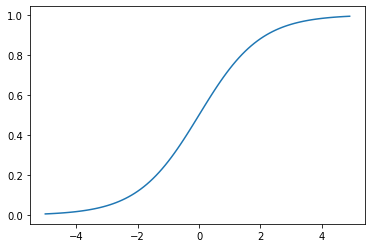

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

x = np.arange(-5., 5., 0.1)
plt.plot(x, sigmoid(x))

## 감사합니다